In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'0.25.0'

In [3]:
# used_cols = [str(x) for x in range(24)]
used_cols = [str(x) for x in range(24)]
# data = pd.read_csv('data/train.csv', encoding="big5", usecols = used_cols)
train_data = pd.read_csv('data/train.csv', encoding="big5")
train_data=train_data.replace("NR",0)
train_data.head()


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [4]:
train_data.columns

Index(['日期', '測站', '測項', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'],
      dtype='object')

In [5]:
np_train_data = train_data[used_cols].to_numpy()
np_train_data.shape

(4320, 24)

In [6]:
newdata = np_train_data.reshape((240,18,24))

In [7]:
newdata = newdata.transpose((0,2,1))

In [8]:
# data['測項'][:18]
new_df = pd.DataFrame(data=newdata.reshape((240*24, 18)),
                        columns=train_data['測項'][:18],dtype=float)

In [9]:
new_df.head()

測項,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,14.0,1.8,0.51,0.20,0.9,16.0,17.0,16.0,56.0,26.0,0.0,77.0,1.8,2.0,37.0,35.0,1.4,0.5
1,14.0,1.8,0.41,0.15,0.6,9.2,9.8,30.0,50.0,39.0,0.0,68.0,2.0,2.0,80.0,79.0,1.8,0.9
2,14.0,1.8,0.39,0.13,0.5,8.2,8.7,27.0,48.0,36.0,0.0,67.0,1.7,2.0,57.0,2.4,1.0,0.6
3,13.0,1.8,0.37,0.12,1.7,6.9,8.6,23.0,35.0,35.0,0.0,74.0,1.6,1.9,76.0,55.0,0.6,0.3
4,12.0,1.8,0.35,0.11,1.8,6.8,8.5,24.0,25.0,31.0,0.0,72.0,1.9,1.9,110.0,94.0,1.7,0.6


In [10]:
new_df.shape

(5760, 18)

In [11]:
# import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,24))
for i in range(len(new_df.columns)):
#     print(new_df.columns[i])
    plt.subplot(6,3,i+1)
    plt.scatter(new_df[new_df.columns[i]], new_df['PM2.5'])
    plt.xlabel(new_df.columns[i])
    plt.ylabel('PM2.5')
    
plt.show()

<Figure size 2000x2400 with 18 Axes>

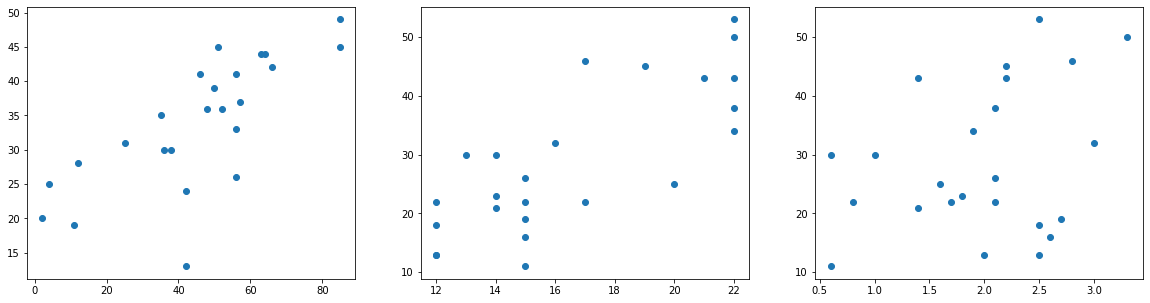

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(new_df['PM10'][0:24], new_df['PM2.5'][0:24])
plt.subplot(1,3,2)
# plt.plot([4,5,6])
plt.scatter(new_df['AMB_TEMP'][0:24], new_df['PM2.5'][24:24*2])

plt.subplot(1,3,3)
plt.scatter(new_df['WIND_SPEED'][0:24], new_df['PM2.5'][24:24*2])

plt.show()

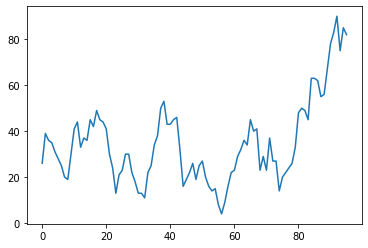

In [13]:
temp = new_df['PM2.5'].astype('float')
plt.plot([x for x in range(96)], temp[:96])

In [14]:
def Ada(X, Y, W, eta, iter_times, lambdaL2):
    list_cost = []
    sum_grad = np.zeros(len(X[0]))
    for i in range(iter_times):
        newY = np.dot(X, W)
        loss = newY - Y
        cost = np.sum(loss**2)/len(X)
        list_cost.append(cost)
        
        grad = np.dot(X.T, loss) / len(X) + lambdaL2* W
        sum_grad += grad**2
        ada=np.sqrt(sum_grad)
        W = W - eta*grad/ada
    return W, list_cost

In [71]:
help(np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are

In [75]:
def Ada_2(X, Y, W, eta, iter_times, lambdaL2):
    list_cost = []
    sum_grad = np.zeros(len(X[0]))
    for i in range(iter_times):
        newY = np.dot(X, W)
        loss = newY - Y
        cost = np.sum(loss**2)/len(X)
        list_cost.append(cost)
        
#         grad = np.dot(X.T, loss) / len(X) + lambdaL2* W
        ridx = np.random.randint(0,len(X))
        grad = X[ridx]*loss[ridx] / len(X) + lambdaL2* W

        sum_grad += grad**2
        ada=np.sqrt(sum_grad)

        ada = np.where(ada==0, 1, ada)
#         if ada:
#             ada = 1
        W = W - eta*grad/ada
#         W -= eta/grad
    return W, list_cost

In [67]:
def SGD(X, Y, W, eta, iter_times, lambdaL2):
    list_cost = []
    for i in range(iter_times):
        newY = np.dot(X, W)
        loss = newY - Y
        cost = np.sum(loss**2)/len(X)
        list_cost.append(cost)
        
        # get one random index to choose one rwo in matrix X
        ridx = np.random.randint(0,len(X))
        grad = X[ridx]*loss[ridx] / len(X) + lambdaL2* W
        W = W - eta*grad
    return W, list_cost

In [17]:
new_df.shape

(5760, 18)

In [18]:
xdata = new_df.to_numpy()

In [19]:
xdata.shape

(5760, 18)

In [20]:
#a = xdata.reshape(int(xdata.shape[0]/9), xdata.shape[1]*9)

In [21]:
## Get trainX
x = []
y = []
for i in range(9,len(xdata)):
    if i % 480 in range(0,9):
        continue
    x.append(xdata[i-9:i].reshape(xdata.shape[1]*9))
    y.append(xdata[i][9]) # column PM2.5
trainX = np.array(x)
trainX = np.concatenate((trainX, np.ones((trainX.shape[0],1))), axis=1)
trainY = np.array(y)

In [22]:
trainX.shape

(5652, 163)

In [23]:
trainY.shape

(5652,)

### Test data

In [24]:
test_df = pd.read_csv('data/test.csv', header=None)
test_df=test_df.replace("NR",0)

In [25]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,15,14,14,13,13,13,13,13,12
1,id_0,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,id_0,CO,0.36,0.35,0.34,0.33,0.33,0.34,0.34,0.37,0.42
3,id_0,NMHC,0.11,0.09,0.09,0.1,0.1,0.1,0.1,0.11,0.12
4,id_0,NO,0.6,0.4,0.3,0.3,0.3,0.7,0.8,0.8,0.9


In [26]:
test_df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [27]:
temp_ndf = test_df[test_df.columns[2:]].to_numpy()
temp_ndf=temp_ndf.reshape((int(temp_ndf.shape[0]/18), 18, temp_ndf.shape[1]))
temp_ndf = temp_ndf.transpose((0,2,1))
temp_ndf = temp_ndf.reshape((temp_ndf.shape[0], temp_ndf.shape[1]*temp_ndf.shape[2]))

In [28]:
temp_ndf[:2]

array([['15', '1.8', '0.36', '0.11', '0.6', '9.3', '9.9', '36', '51',
        '27', 0, '75', '1.2', '1.9', '116', '115', '2.6', '2.1', '14',
        '1.8', '0.35', '0.09', '0.4', '7.1', '7.5', '44', '51', '13', 0,
        '71', '1.2', '1.8', '114', '113', '2.2', '2.4', '14', '1.8',
        '0.34', '0.09', '0.3', '6.1', '6.4', '45', '31', '24', 0, '71',
        '1.2', '1.8', '112', '105', '2', '2.2', '13', '1.8', '0.33',
        '0.1', '0.3', '5.7', '5.9', '44', '40', '29', 0, '73', '1.6',
        '1.9', '109', '102', '1.9', '1.9', '13', '1.8', '0.33', '0.1',
        '0.3', '5.5', '5.8', '44', '34', '41', 0, '74', '1.5', '1.9',
        '111', '106', '2.4', '2.3', '13', '1.8', '0.34', '0.1', '0.7',
        '5.3', '6', '44', '51', '30', 0, '74', '1.5', '1.9', '104',
        '106', '2.4', '2.3', '13', '1.8', '0.34', '0.1', '0.8', '5.5',
        '6.2', '43', '42', '29', 0, '74', '1.5', '1.9', '107', '112',
        '2.5', '2.5', '13', '1.8', '0.37', '0.11', '0.8', '7.1', '7.8',
        '40',

In [29]:
test_data = pd.DataFrame(data=temp_ndf, dtype=float,
                        index=test_df[0].unique())
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
id_0,15.0,1.8,0.36,0.11,0.6,9.3,9.9,36.0,51.0,27.0,...,30.0,28.0,0.0,74.0,1.6,1.9,104.0,106.0,2.0,2.3
id_1,12.0,1.8,0.46,0.06,0.5,5.5,6.0,41.0,77.0,46.0,...,150.0,61.0,0.0,47.0,5.7,2.0,102.0,105.0,3.3,1.5
id_2,8.8,1.7,0.46,0.16,2.2,11.0,13.0,28.0,11.0,10.0,...,48.0,22.0,0.0,30.0,2.7,1.8,310.0,1.0,1.5,1.4
id_3,21.0,1.8,0.44,0.13,2.2,20.0,22.0,67.0,88.0,71.0,...,54.0,29.0,0.0,72.0,2.0,1.9,113.0,110.0,2.5,2.4
id_4,15.0,1.9,0.57,0.41,1.9,25.0,27.0,13.0,22.0,13.0,...,9.0,12.0,0.0,49.0,1.1,1.8,75.0,71.0,1.7,0.9


In [30]:
testX = test_data.values
testX = np.concatenate((testX, np.ones((testX.shape[0],1))), axis=1)
testX.shape

(240, 163)

In [31]:
test_df[test_df[1] == 'PM2.5'].head()

,0,1,2,3,4,5,6,7,8,9,10
9,id_0,PM2.5,27,13,24,29,41,30,29,27,28
27,id_1,PM2.5,46,47,57,78,84,76,59,61,61
45,id_2,PM2.5,10,10,25,34,40,39,36,25,22
63,id_3,PM2.5,71,58,51,41,41,46,43,34,29
81,id_4,PM2.5,13,23,18,10,5,5,13,9,12


In [32]:
ans = pd.read_csv('data/ans.csv')
ans.head()

,id,value
0,id_0,33
1,id_1,60
2,id_2,16
3,id_3,33
4,id_4,5


In [33]:
testY = pd.DataFrame(data=ans.value.to_numpy(), dtype=int, index=ans.id, columns=['value'])
testY.head()

,value
id,
id_0,33
id_1,60
id_2,16
id_3,33
id_4,5


In [34]:
testY.shape

(240, 1)

In [35]:
testyy=pd.DataFrame()
testyy['value']=ans['value']
testyy.index = ans['id']
testyy.head()

,value
id,
id_0,33
id_1,60
id_2,16
id_3,33
id_4,5


In [68]:
w = np.zeros(len(trainX[0]))
w_sgd, cost_list_sgd = SGD(trainX, trainY, w, eta=0.0001, iter_times=20000, lambdaL2=0.001)
# w_sgd50, cost_list_sgd50 = SGD(trainX, trainY, w, eta=0.0001, iteration=20000, lambdaL2=50)

In [69]:
trainX.shape

(5652, 163)

In [106]:
w_ada, cost_list_ada = Ada(trainX, trainY, w, eta=0.001, iter_times=20000, lambdaL2=0)
# w_gd, cost_list_gd = SGD(trainX, trainY, w, eta=0.0001, iteration=20000, lambdaL2=0)

In [126]:
w_ada_2, cost_list_ada_2 = Ada_2(trainX, trainY, w, eta=0.03, iter_times=20000, lambdaL2=0.0001)

In [127]:
print(f"sgd min lost: {np.min(cost_list_sgd)}")
print(f"ada min lost: {np.min(cost_list_ada)}")
print(f"ada-2 min lost: {np.min(cost_list_ada_2)}")

sgd min lost: 109.03080205639736
ada min lost: 62.61428344985875
ada-2 min lost: 41.1250696760317


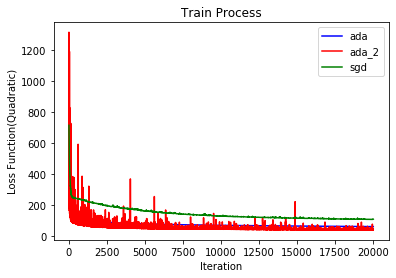

In [128]:
import matplotlib.pyplot as plt


plt.plot(np.arange(len(cost_list_ada[3:])), cost_list_ada[3:], 'b', label="ada")
plt.plot(np.arange(len(cost_list_ada_2[3:])), cost_list_ada_2[3:], 'r', label="ada_2")
plt.plot(np.arange(len(cost_list_sgd[3:])), cost_list_sgd[3:], 'g', label='sgd')

plt.title('Train Process')
plt.xlabel('Iteration')
plt.ylabel('Loss Function(Quadratic)')
plt.legend()
plt.show()

# Inference

In [129]:
y_ada = np.dot(testX, w_ada)
y_ada_2 = np.dot(testX, w_ada_2)
y_sgd = np.dot(testX, w_sgd)

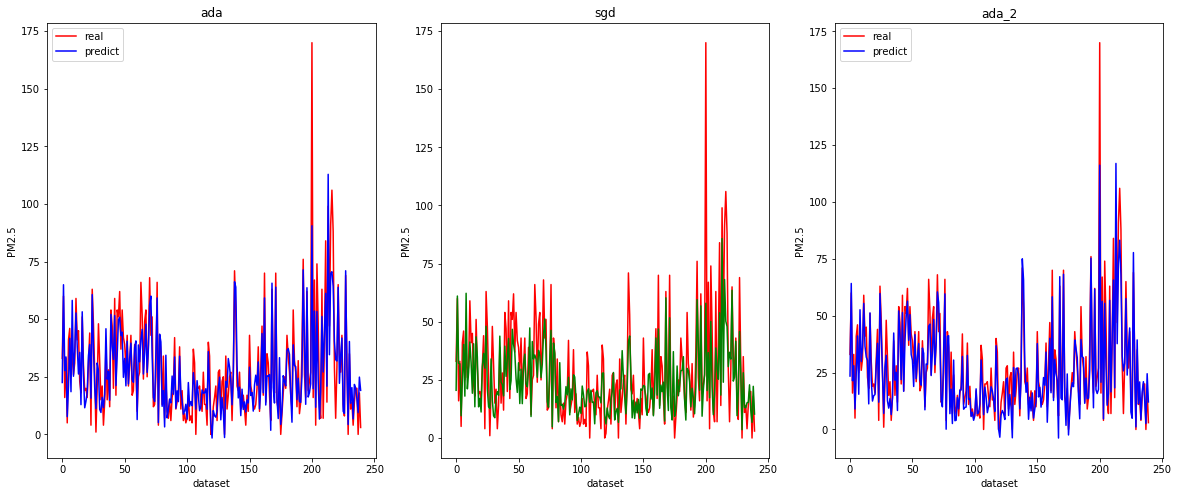

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.plot(np.arange((len(testY))), testY, 'r', label='real')
plt.plot(np.arange((len(y_ada))), y_ada, 'b', label='predict')
plt.title('ada')
plt.xlabel('dataset')
plt.ylabel('PM2.5')
plt.legend()

plt.subplot(1,3,2)
plt.plot(np.arange((len(testY))), testY, 'r', label='real')
plt.plot(np.arange((len(y_sgd))), y_sgd, 'g', label='predict')
plt.title('sgd')
plt.xlabel('dataset')
plt.ylabel('PM2.5')


plt.subplot(1,3,3)
plt.plot(np.arange((len(testY))), testY, 'r', label='real')
plt.plot(np.arange((len(y_sgd))), y_ada_2, 'b', label='predict')
plt.title('ada_2')
plt.xlabel('dataset')
plt.ylabel('PM2.5')

plt.legend()
plt.show()

In [ ]:
np.arange((5))